In [1]:
from scipy import integrate
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib import pyplot as plt      
import pandas as pd
from scipy import special                 
import array
import scipy as sp
import scipy.interpolate
import re
import pickle as pickle


In [2]:
with open('binning_result_5.29.pkl','rb') as f:
    result = pickle.load(f)

In [3]:
def change_to_redshift(distance,redshift):
    '''change Cmpc to redshift, start at the redshift of the box'''
    distance_redshift = []
    distance_redshift.append(redshift)
    distance_difference = redshift
    for i in range(len(distance)-1):
        distance_difference -= (distance[i+1] - distance[i]) / 100 * .23
        distance_redshift.append(distance_difference)
    return distance_redshift

def change_to_wavelength(redshift_distance,redshift):
    start_wavelength = 912
    wavelength = []
    for i in range(len(redshift_distance)):
        wavelength.append(912*(1+redshift_distance[i])/(1+redshift))
    return wavelength

def unPackRawFile(raw_path):
    """
    - unpacks the .raw file. Not used for the neural network.
    """
    y = np.loadtxt(raw_path, skiprows=6)
    distance = y[:,0]
    pec_vel = y[:,1]
    temp = y[:,2]
    HI_density = y[:,3]
    gas_density = y[:,4]
    gas_metallicity = y[:,5]
   
    return distance, pec_vel, temp, HI_density, gas_density, gas_metallicity

def distance_measurement(redshift, result):
    total_distance = []
    distance_average = 0
    distance_median = 0
    factor = 1/(redshift+1)/.68
    for i in result:
        for k in range(1,len(i[0])):
            if(np.power(np.e,np.multiply(-1,i[0][k])) >0.3679):
                distance_average += 0.0667
        for k in range(1,len(i[1])):
            if(np.power(np.e,np.multiply(-1,i[1][k])) >0.3679):
                distance_median += 0.0667
        total_distance.append([np.multiply(distance_average,factor),np.multiply(distance_median,factor)])
        distance_average = 0
        distance_median = 0
    return total_distance

In [4]:
total_distance = distance_measurement(5.29, result)

In [5]:
total_distance

[[1.6841859160198258, 14.190825773870559],
 [2.822570840736943, 10.229870008416682],
 [23.344688113718693, 13.03684653511628],
 [1.2943280650893105, 14.409146170391638],
 [11.352660619096522, 14.424740484428858],
 [3.92976713737962, 11.664546899840921],
 [3.9921443935285037, 12.75614888244632],
 [1.5438370896848403, 14.627466566912718],
 [17.138151126905136, 14.783409707284918],
 [4.506756756756791, 10.494973347049422],
 [0.2651033386327504, 15.26683344243874]]

In [6]:
average = []
median = []
for i in total_distance:
    average.append(i[0])
    median.append(i[1])

In [28]:
np.max(average)

23.344688113718693

In [25]:
np.average(median)

13.262255256199733

In [32]:
x = [5.29,5.88,6.37]
y_median = [13.26,4.94,2.35]
y_median_min = np.subtract(y_median,[10.23,4.106,1.58])
y_median_max = np.subtract([15.267,6,2.99],y_median)
y_median_error = [y_median_min,y_median_max]

In [33]:
y_mean = [6.53,3.214,2.67]
y_mean_min = np.subtract(y_mean,[0.2651033386327504,0.5987944596443228,0.6654561417511371])
y_mean_max = np.subtract([23.34,7.46,5.6],y_mean)
y_mean_error = [y_median_min,y_median_max]

In [34]:
y_without_lls_mean = 5.79
y_without_lls_median = 6.33
x_w_out_lls = 5.88

In [52]:
x_new= np.linspace(3,6.2,1000)
y = 37*((1+x_new)/5)**(-5.4)

In [53]:
len(y)

1000

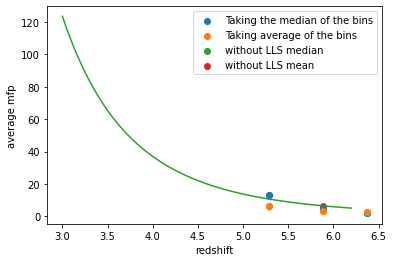

In [54]:
plt.scatter(x,y_median,label = "Taking the median of the bins")
plt.errorbar(x, y_median,
             yerr = y_median_error,
             fmt ='o')
plt.scatter(x,y_mean, label = "Taking average of the bins")
plt.errorbar(x, y_mean,
             yerr = y_mean_error,
             fmt ='o')
plt.xlabel("redshift")

plt.scatter(x_w_out_lls,y_without_lls_median, label = "without LLS median")
plt.scatter(x_w_out_lls,y_without_lls_mean, label = "without LLS mean")
plt.plot(x_new,y)
plt.ylabel("average mfp")
plt.legend()